In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import os
from os import getcwd, chdir, mkdir

In [2]:
cwd = os.getcwd()


plotwd = cwd + "/Cp_avg.pdf"
probesFile_p = os.path.join(cwd, "postProcessing/probes/0.000000/p")
probesFile_rho = os.path.join(cwd, "postProcessing/probes/0.260000/rho")
chdir(cwd)
cwd

'/media/timo/sharedParti/Cavitation/compMultiphaseCavitation_validation/Branches/Features/corrAlphaVapor/hemisphHead_grid8_2_3_Re1_36k_simulations/hemisphHead_grid8_2_3_Re1_36k_K0_4_refinement003_sim003'

In [3]:
from pathlib import Path

my_file = Path(probesFile_p)
if my_file.is_file():
    print("OK")
else:
    print("Not OK")

OK


In [4]:
from pathlib import Path

my_file = Path(probesFile_rho)
if my_file.is_file():
    print("OK")
else:
    print("Not OK")

OK


# Reading p field
## Reading in the probes coords in the top section of the file. Number of Probes must be known

In [5]:
probesNo = 999
probeTypes = {}

### Splitting the lines of the top section by whitespace

In [6]:
lines = list()
with open(probesFile_p, 'r') as f:
    for line in f:
        splitted = line.split(' ')
        lines.append(splitted)
print("#Lines: {}".format(len(lines)))

df = pd.DataFrame(data=lines[:])
df_top = df[0:probesNo]
# Reading only the probe No and the coordinates
df_top = df_top[[2, 3, 4, 5]]

df_top.rename(columns={2:'Probe',3:'x',4:'y',5:'z'}, inplace=True)


#Remove the bracket in x
# Create list of x values
newx = list()
x = df_top['x'].tolist()
for ix in x:
    ix = ix.replace("(", "")
    newx.append(ix)
df_top['x'] = newx
df_top['x'] = pd.to_numeric(df_top['x'])

df_top['y'] = pd.to_numeric(df_top['y'])

#Remove the bracket in z
# Create list of z values
newx = list()
x = df_top['z'].tolist()
for ix in x:
    ix = ix.replace(")", "")
    newx.append(ix)
df_top['z'] = newx
df_top['z'] = pd.to_numeric(df_top['z'])



## Reading the values of the probes in the bottom section. Number of probes must be known
### Splitting the lines in the bottom section by tabs
num_lines = sum(1 for line in open(probesFile_p))
#print("#Lines: {}".format(num_lines))

# Reading the rows with values
lines = list()
with open(probesFile_p, 'r') as f:
    count = 0
    for line in f:
        #Staring row with vales is probes+2
        if count > probesNo+2:
            splitted = line.split(' ')
            lines.append(splitted)
        count = count + 1

# removing empty list items  
newline = list()
for i in range(len(lines)):
    for j in lines[i]:
        if j != '' :
            # removing the line break of the last list item
            j = j.replace("\n", "")
            newline.append(j)
    lines[i] = newline
    newline = list()
    
# Creating an array to construct a dataFrame with
values_p = np.array(lines)
values_p = values_p.transpose().tolist()

#Lines: 1016


# Reading rho

In [7]:
lines = list()
with open(probesFile_rho, 'r') as f:
    for line in f:
        splitted = line.split(' ')
        lines.append(splitted)
print("#Lines: {}".format(len(lines)))

df = pd.DataFrame(data=lines[:])
df_top = df[0:probesNo]
# Reading only the probe No and the coordinates
df_top = df_top[[2, 3, 4, 5]]

df_top.rename(columns={2:'Probe',3:'x',4:'y',5:'z'}, inplace=True)


#Remove the bracket in x
# Create list of x values
newx = list()
x = df_top['x'].tolist()
for ix in x:
    ix = ix.replace("(", "")
    newx.append(ix)
df_top['x'] = newx
df_top['x'] = pd.to_numeric(df_top['x'])

df_top['y'] = pd.to_numeric(df_top['y'])

#Remove the bracket in z
# Create list of z values
newx = list()
x = df_top['z'].tolist()
for ix in x:
    ix = ix.replace(")", "")
    newx.append(ix)
df_top['z'] = newx
df_top['z'] = pd.to_numeric(df_top['z'])



## Reading the values of the probes in the bottom section. Number of probes must be known
### Splitting the lines in the bottom section by tabs
num_lines = sum(1 for line in open(probesFile_rho))
#print("#Lines: {}".format(num_lines))

# Reading the rows with values
lines = list()
with open(probesFile_rho, 'r') as f:
    count = 0
    for line in f:
        #Staring row with vales is probes+2
        if count > probesNo+2:
            splitted = line.split(' ')
            lines.append(splitted)
        count = count + 1

# removing empty list items  
newline = list()
for i in range(len(lines)):
    for j in lines[i]:
        if j != '' :
            # removing the line break of the last list item
            j = j.replace("\n", "")
            newline.append(j)
    lines[i] = newline
    newline = list()
    
# Creating an array to construct a dataFrame with
values_rho = np.array(lines)
values_rho = values_rho.transpose().tolist()

#Lines: 1015


## Creating Dataframe

In [8]:
dff = pd.DataFrame(data=values_p)
df_bottom = dff

In [9]:
df_rho = pd.DataFrame(data=values_rho)
df_bottom[::1000]
df_rho[::1000]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.26,0.265,0.27,0.275,0.28,0.285,0.29,0.295,0.3,0.305,0.31,0.315,0.32
1000,1027.01,1027,1027,1027,1027,1027,1027,1027,1027,1027,1027,1027,1027


## Cleaning col names 

### Renaming columns for all time steps

In [10]:
times = df_bottom.iloc[0].tolist()
df_bottom.columns = times
df_bottom.drop([0], inplace=True)

In [11]:
times = df_rho.iloc[0].tolist()
df_rho.columns = times
df_rho.drop([0], inplace=True)

###  Removing duplicates 

In [12]:
#For some reson, the last simulation time is imported twice. Hack: Remove the duplicate entries
df_bottom = df_bottom.loc[:,~df_bottom.columns.duplicated()]


In [13]:
df_rho = df_rho.loc[:,~df_rho.columns.duplicated()]

In [14]:
print(df_bottom.columns)

for col in df_bottom:
    df_bottom[col] = pd.to_numeric(df_bottom[col])
    


Index(['0', '0.26', '0.265', '0.27', '0.275', '0.28', '0.285', '0.29', '0.295',
       '0.3', '0.305', '0.31', '0.315', '0.32'],
      dtype='object')


In [15]:
for col in df_rho:
    df_rho[col] = pd.to_numeric(df_rho[col])

### Calculating the average values after time step 0.84
The df_final DataFrame holds only time step columns for now. Additional information is added from this from here on.

In [16]:
minTimeStep = 0.26

df_bottom.columns = pd.to_numeric(df_bottom.columns)
col_means = np.empty(0)
for i in df_bottom:
    if i >= minTimeStep:
        col_means = np.append(col_means, i)
df_mean = df_bottom.loc[:, col_means]
df_bottom['p_avg']  = df_mean.mean(axis=1)

print(col_means)
df_p = df_bottom.loc[:, col_means]



[ 0.26   0.265  0.27   0.275  0.28   0.285  0.29   0.295  0.3    0.305
  0.31   0.315  0.32 ]


In [17]:
df_rho.columns = pd.to_numeric(df_rho.columns)
col_means = np.empty(0)
for i in df_rho:
    if i >= minTimeStep:
        col_means = np.append(col_means, i)
df_mean = df_rho.loc[:, col_means]
# rho exist only since the moment cavitation occurs

df_rho['rho_avg']  = df_mean.mean(axis=1)

#df_bottom['rho'] = df_rho['rho_avg']
df_bottom['rho'] = 1000

In [18]:
df_final = df_bottom

### Helper functions

In [19]:
def calcCp_deprecated(p, p0, U0, rho):
    _p = np.array(p)
    _p0 = np.array(p0)
    _U0 = np.array(U0)
    _rho = np.array(rho)    
    return (_p - _p0) / (0.5 * _U0**2 * _rho)

def calcCp(df_p,p0,U,rho):
    df_cp = pd.DataFrame()
    for i in df_p:
        #print(i)
        _p = np.array(df_p[i])
        _p0 = np.array(p0)
        _U0 = np.array(U)
        _rho = np.array(rho)
        #print(_p.shape)
        #print(_rho.shape)
        #print(_p0.shape)
        df_cp[i] = (_p - _p0) / (0.5 * _U0**2 * _rho)
    return df_cp

In [20]:
df_final['p0'] = 70025.0 #70025.0 #87177.4 #82620.9
df_final['U0'] = 12.9746



df_p0 = df_p * 0 + 70025.0
df_U = df_p * 0 + 12.9746

# Dropping pressure values < 0
indexToDrop = df_p[df_p[minTimeStep] < 0].index
df_p = df_p.drop(indexToDrop)


In [21]:
df_rho = df_rho.drop(indexToDrop)

In [22]:
df_final = df_final.drop(indexToDrop)
print(df_p.shape, df_final.shape)

(995, 13) (995, 18)


In [23]:
df_final[-5:]

,0.0,0.26,0.265,0.27,0.275,0.28,0.285,0.29,0.295,0.3,0.305,0.31,0.315,0.32,p_avg,rho,p0,U0
996,2500000.0,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42,8615.559231,1000,70025.0,12.9746
997,2500000.0,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42,8615.559231,1000,70025.0,12.9746
998,2500000.0,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42,8615.559231,1000,70025.0,12.9746
999,2500000.0,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42,8615.559231,1000,70025.0,12.9746
1000,2500000.0,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42,8615.559231,1000,70025.0,12.9746


In [24]:
df_p[-5:]

,0.26,0.265,0.27,0.275,0.28,0.285,0.29,0.295,0.3,0.305,0.31,0.315,0.32
996,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42
997,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42
998,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42
999,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42
1000,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42


### Calculating Cp

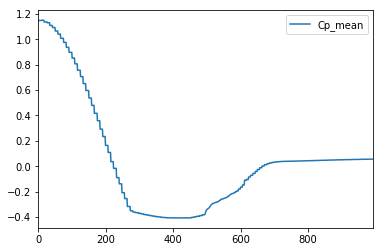

In [25]:
#df_final['rho'] = 
#df_final['Cp'] = calcCp(df_final['p_avg'], df_final['p0'], df_final['U0'], df_final['rho'])
p0 = 7849.5
U = 5.25
df_tmp = calcCp(df_p, p0, U, 1000)
df_tmp['Cp_mean'] = df_tmp.mean(axis=1)
#df_tmp[-5:]
df_tmp.plot(y='Cp_mean')
df_final['Cp_mean'] = df_tmp['Cp_mean']

In [26]:
# Calculating the arc length from the dataframe
def radToGrad(rad):
    return rad * 180 / math.pi

def angle2D(x,y,z):
    x, y, z = x, y, z
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    c  = np.sqrt(x**2 + y**2)
    alpha = abs(np.arccos(x/c))
    alpha = np.sort(alpha, axis=0)
    return alpha

def arcLength(radius, alpha):
    alpha = np.array(alpha)
    radius = np.array(radius)
    arc = radius*alpha
    #arc = np.sort(arc, axis=0)
    return arc

def correctArcLengthOnLine(dataFrame):
    pass

df_final.loc[1:, 'x'] = df_top['x']
df_final.loc[1:, 'y'] = df_top['y']
df_final.loc[1:, 'z'] = df_top['z']

#example
#df.replace([np.inf, -np.inf], np.nan)
# make inf values nan so that pandas can handle it
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(subset=["x"], how="all")
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(subset=["y"], how="all")
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(subset=["z"], how="all")

# drop negative pressure values messing up the table (only one value)
df_final = df_final.drop(df_final[df_final['p_avg'] < 0].index)

df_final['alpha'] = angle2D(df_final['x'],df_final['y'],df_final['z'])
df_final['radius'] = 0.01225

times = df_final.iloc[0].tolist()
maxTime = max(times)
#df_bottom['latestTime'] = df_bottom[maxTime]
df_final[:3]

# creating one final dataframe with all info of the data file
df_final[:3]

,0.0,0.26,0.265,0.27,0.275,0.28,0.285,0.29,0.295,0.3,...,p_avg,rho,p0,U0,Cp_mean,x,y,z,alpha,radius
1,2500000.0,36748.7,25072.8,23550.3,23143.4,22822.2,22396.7,22197.6,22114.8,22057.4,...,23670.169231,1000,70025.0,12.9746,1.147985,-0.012250,0.000038,0.0,0.040892,0.01225
2,2500000.0,36748.7,25072.8,23550.3,23143.4,22822.2,22396.7,22197.6,22114.8,22057.4,...,23670.169231,1000,70025.0,12.9746,1.147985,-0.012250,0.000077,0.0,0.040975,0.01225
3,2500000.0,36748.7,25072.8,23550.3,23143.4,22822.2,22396.7,22197.6,22114.8,22057.4,...,23670.169231,1000,70025.0,12.9746,1.147985,-0.012249,0.000115,0.0,0.041057,0.01225


#### Testing arcLength calc

In [27]:
r = df_final['radius']
alpha =df_final['alpha']
df_final['arcLength'] = arcLength(r,alpha)
df_final['arcLength'] = df_final['arcLength'] / (df_final['radius']*2)

df_head = df_final.drop(df_final[df_final.x >= 0].index)
df_cylinder = df_final.drop(df_final[df_final.x < 0.0].index)

ind = len(df_head['x'].tolist()) 
sI  = df_head.loc[ind].x
df_cylinder['arcLength'] = sI + df_cylinder['x']  / (df_final['radius']*2)
#df_cylinder['arcLength']

In [28]:
#df_finall = df_head#.drop(df_final[df_final.x > 0].index)
#df_finall[:3]

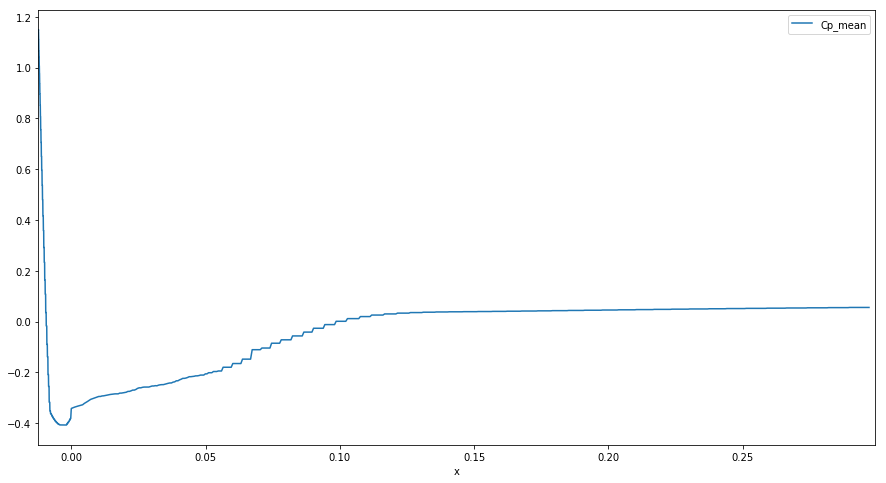

In [29]:
df_final['xd'] = df_final['x'] / (2 * df_final['radius'])

df_finall = df_final
xtic = list()
for i in range(-1,10,1):
    xtic.append(i/100)
ytic = list()
for i in range(-11,21,1):
    ytic.append(i/10)
ax2 = df_finall.plot(x='x', y=['Cp_mean'], figsize=(15,8))#, xticks=xtic, yticks=ytic)
#df_finall.loc[:,['xd','x']]
#df_finall['xd'] = 2

# Hemispherical Head Parametrization

In [30]:
radius = 0.01225
r = 1
#xr = np.linspace(-radius,0,100)
xr = np.array(df_head['x'].tolist())
yr = np.array(df_head['y'].tolist())
#yr = np.sqrt(xr**2 + radius**2)
#xi = xr / radius
#yi = yr / radius
#yi = np.tan(alphai) * xi

alphai = np.arctan(abs(yr / xr))
#print(alphai)

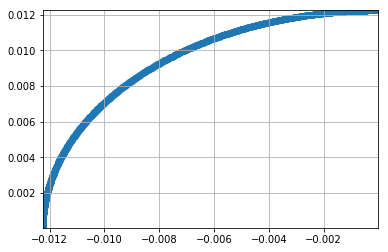

,xr,yr,alphai
489,-0.000192,0.012249,1.555088
490,-0.000154,0.012249,1.558230
491,-0.000115,0.012249,1.561372
492,-0.000077,0.012250,1.564513
493,-0.000038,0.012250,1.567655


In [31]:
#df.replace([np.inf, -np.inf], np.nan).dropna(subset=["col1", "col2"], how="all")
#print(xr[800:900])
# cleaning from nan
tmpdf = pd.DataFrame(data=xr, columns=['xr'])
tmpdf['yr'] = yr
#tmpdf['yi'] = yi
#tmpdf['xi'] = xi
tmpdf['alphai'] = alphai
tmpdf = tmpdf.replace([np.inf, -np.inf], np.nan).dropna(subset=["xr"], how="all")
tmpdf = tmpdf.replace([np.inf, -np.inf], np.nan).dropna(subset=["alphai"], how="all")


xr = np.array(tmpdf['xr'].tolist())
yr = np.array(tmpdf['yr'].tolist())
#yi = np.array(tmpdf['yi'].tolist())
#xi = np.array(tmpdf['xi'].tolist())
alphai = np.array(tmpdf['alphai'].tolist())


fig, ax = plt.subplots()
xt = xr[:]
yt = yr[:]
ax.scatter(xt,yt)
ax.grid()
plt.ylim(min(yt), max(yt))
plt.xlim(min(xt), max(xt))
plt.show()

tmpdf[-5:]

0.019203770415686779

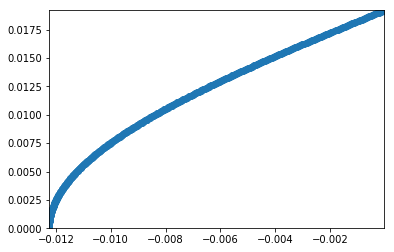

In [32]:
bi  = radius *  alphai
fig, ax = plt.subplots()
ax.scatter(xr,bi)
plt.ylim(min(bi),max(bi))
plt.xlim(min(xr),max(xr))
#plt.show()
bi[-1]

In [33]:
print(alphai[1])

0.00628316275692


In [34]:
math.cos(alphai[1])  * radius

0.012249758197223338

In [35]:
print(alphai[-1])

1.56765472781


In [36]:
math.cos(alphai[-1]) * radius

3.848452424587127e-05

In [37]:
#numberSteps = 10000
#xi_2 = np.linspace(0,8,numberSteps)
xi_2 = np.array(df_cylinder['x'].tolist())
#yi_2 = np.linspace(0,8,numberSteps)
yi_2 = np.array(df_cylinder['x'].tolist())
for i in range(len(yi_2)):
    yi_2[i] = radius

# '*', due to radius < 1
y = yr
y = np.append(y, yi_2)

x = xr 
x = np.append(x, xi_2)

s = bi
bi_2 = xi_2
for i in range(len(bi_2)):
    bi_2[i] = bi_2[i] + s[-1]
#s= np.append(s, xi_2)
s= np.append(s, bi_2)



In [38]:
bi_2[:5]

array([ 0.01920377,  0.01980497,  0.02040617,  0.02100738,  0.02160858])

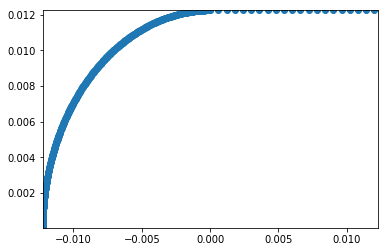

In [39]:
fig, ax = plt.subplots()
ax.scatter(x,y)
plt.ylim(min(y),max(y))
plt.xlim(min(x),1*radius)
plt.show()

In [40]:
df = pd.DataFrame(data=x, columns=['x'])
df['y'] = y
df['s'] = s
dff = df.iloc[:]
#dff.plot(kind='scatter', x='s', y='x')

In [41]:
df_final['s'] = df['s']
df_final['sd'] = df_final['s'] /  (2*radius)
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(subset=["s"], how="all")
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(subset=["sd"], how="all")

In [42]:
sd_m08 = [0.0,0.3,0.4,0.5,0.6,0.6,0.7,0.8,0.9,1.0,1.5,2.0,2.5,3.5]
cp_m08 = [1,0.5,0,-0.2,-0.4,-0.6,-0.74,-0.6,-0.18,-0.15,-0.07,-0.04,-0.02,-0.01]
df_meas_K08 = pd.DataFrame(data=sd_m08, columns=['sd_m'])
df_meas_K08['Cp_m'] = cp_m08
#df_meas[['sd_m', 'Cp_m']]

sd_m04 = [0.0, 0.4, 0.5 , 1.0 , 1.375, 1.5  , 1.75, 2.5]
cp_m04 = [1.0, 0.0,-0.39,-0.39,-0.2  , -0.05, 0.04, -0.03]
df_meas_K04 = pd.DataFrame(data=sd_m04, columns=['sd_m'])
df_meas_K04['Cp_m'] = cp_m04

In [43]:
-0.4 * 0.5 * 1027 * 5.25**2 + p0

2188.1624999999995

In [44]:
df_p[-1:]

,0.26,0.265,0.27,0.275,0.28,0.285,0.29,0.295,0.3,0.305,0.31,0.315,0.32
1000,22600.6,7812.46,7985.06,7924.33,7854.4,7332.36,7269.81,7203.8,7287.73,7229.95,6999.87,7135.48,7366.42


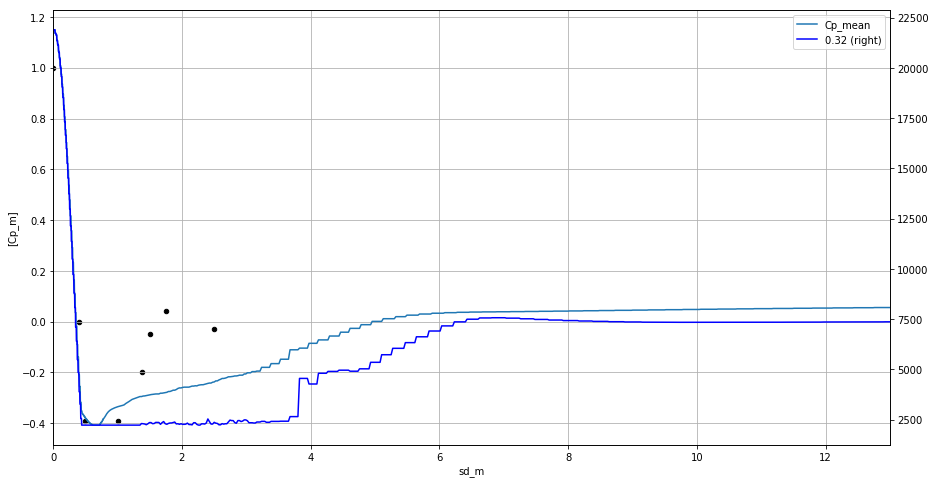

In [45]:
xtic = list()
for i in range(0,1401):
    xtic.append(i/10)
ytic = list()
for i in range(-10,15,1):
    ytic.append(i/10)
df_plot = df_final#.drop(df_final[df_final.sd > 1.2].index)
ax1 = df_plot.plot(x='sd', y=['Cp_mean'], figsize=(15,8),grid=True)#, xticks=xtic, yticks=ytic)
lastTime = df_p.columns.tolist()[-1]
df_plot.plot(kind='line', x='sd', y=[lastTime],grid=True, secondary_y=True, color='b', ax=ax1)

df_meas_K04.plot(kind='scatter', x='sd_m', y=['Cp_m'],grid=True, color='k', ax=ax1)

fig = ax1.get_figure()
fig.savefig(plotwd)

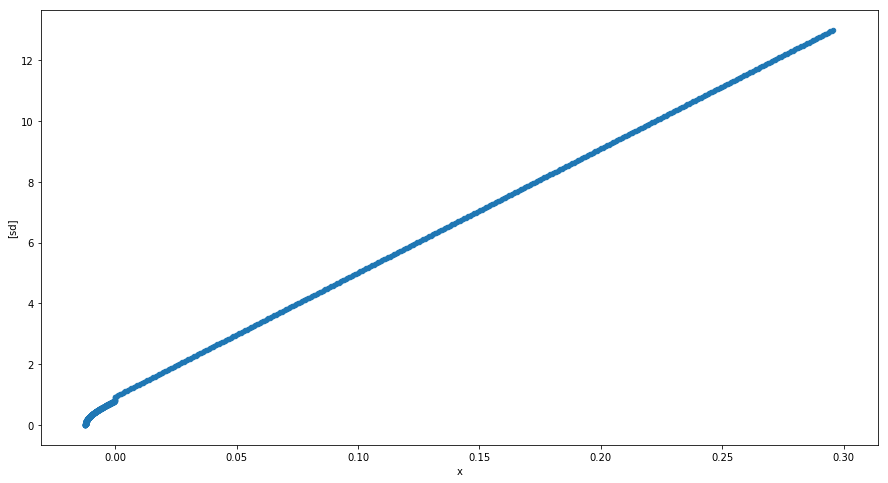

In [46]:
df_plot.plot(kind='scatter', x='x', y=['sd'], figsize=(15,8))#, xticks=xtic, yticks=ytic)

In [47]:
df_rho['sd'] = df_final['sd']
df_rho.plot(x='sd', y=[0.365] figsize=(15,8))#, y=[0.365])#, figsize=(15,8))#, xticks=xtic, yticks=ytic)
#df_rho

SyntaxError: invalid syntax (<ipython-input-47-4fb8b331fae3>, line 2)